In [2]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import pandas as pd 
import numpy  as np


%matplotlib inline

In [41]:
data = pd.read_csv("emnist-balanced-train.csv")
data_t = pd.read_csv("emnist-balanced-test.csv")

In [42]:
data.iloc[:,0]=data.iloc[:,0]-1
data_t.iloc[:,0]=data_t.iloc[:,0]-1

In [43]:
data_t.iloc[:,0].min(),data_t.iloc[:,0].max()
data.iloc[:,0].min(),data.iloc[:,0].max()

(-1, 45)

In [44]:
x = data.iloc[:,1:].values
y=data.iloc[:,0].values+1
x_t = data_t.iloc[:,1:].values
y_t=data_t.iloc[:,0].values+1
x.shape,y.shape,x_t.shape,y_t.shape

((112799, 784), (112799,), (18799, 784), (18799,))

In [45]:
# x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42,stratify=y,shuffle=True)
x_train=x
x_test=x_t
y_train=y
y_test=y_t

In [46]:
x_train = x_train / 255
x_test = x_test / 255

In [47]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((112799, 784), (18799, 784), (112799,), (18799,))

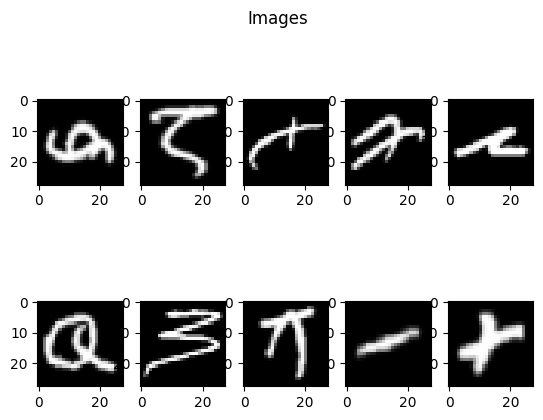

In [48]:
plt.suptitle('Images')
for i in range(10):
    image = x_train[i].reshape((28,28))
    plt.subplot(2,5,i+1)
    plt.imshow(image,cmap="gray")


# Model:

In [49]:
model= Sequential([
    tf.keras.Input(shape=(784,)),
    Dense(units=512,activation="relu",name="layer1"),
    Dense(units=256,activation="relu",name="layer2"),
    Dense(units=47,activation="softmax",name="layer3")
],name="Mymodel"
)

In [50]:
model.summary()

Model: "Mymodel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 512)               401920    
                                                                 
 layer2 (Dense)              (None, 256)               131328    
                                                                 
 layer3 (Dense)              (None, 47)                12079     
                                                                 
Total params: 545,327
Trainable params: 545,327
Non-trainable params: 0
_________________________________________________________________


In [51]:
[layer1,layer2,layer3]=model.layers

w1,b1=layer1.get_weights()
w2,b2=layer2.get_weights()
w3,b3=layer3.get_weights()

print(f"w1 shape:{w1.shape} , b1 shape: {b1.shape}")
print(f"w2 shape:{w2.shape} , b2 shape: {b2.shape}")
print(f"w3 shape:{w3.shape} , b3 shape: {b3.shape}")

w1 shape:(784, 512) , b1 shape: (512,)
w2 shape:(512, 256) , b2 shape: (256,)
w3 shape:(256, 47) , b3 shape: (47,)


In [52]:
model.compile(loss=SparseCategoricalCrossentropy(from_logits=True)
            ,optimizer=Adam(learning_rate=1e-3)
            , metrics=["accuracy"]
)

In [53]:
x_train=np.array(x_train)

In [54]:
Letter_recognition=model.fit(
    x_train,y_train,
    epochs=100,batch_size=32
)

Epoch 1/100


c:\Users\emara\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


3525/3525 [==============================] - 20s 6ms/step - loss: 0.8057 - accuracy: 0.7501
Epoch 2/100
3525/3525 [==============================] - 18s 5ms/step - loss: 0.4940 - accuracy: 0.8303
Epoch 3/100
3525/3525 [==============================] - 18s 5ms/step - loss: 0.4164 - accuracy: 0.8520
Epoch 4/100
3525/3525 [==============================] - 18s 5ms/step - loss: 0.3709 - accuracy: 0.8652
Epoch 5/100
3525/3525 [==============================] - 18s 5ms/step - loss: 0.3348 - accuracy: 0.8750
Epoch 6/100
3525/3525 [==============================] - 18s 5ms/step - loss: 0.3078 - accuracy: 0.8835
Epoch 7/100
3525/3525 [==============================] - 18s 5ms/step - loss: 0.2860 - accuracy: 0.8902
Epoch 8/100
3525/3525 [==============================] - 18s 5ms/step - loss: 0.2654 - accuracy: 0.8959
Epoch 9/100
3525/3525 [==============================] - 11s 3ms/step - loss: 0.2521 - accuracy: 0.9012
Epoch 10/100
3525/3525 [==============================] - 10s 3ms/step - los

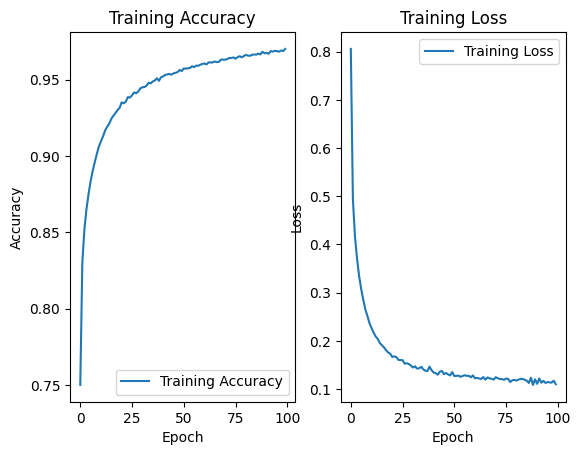

In [55]:
plt.subplot(1, 2, 1)
plt.plot(Letter_recognition.history['accuracy'], label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(Letter_recognition.history['loss'], label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [56]:
prediction_model=model.predict(x_test)

588/588 [==============================] - 1s 2ms/step


In [57]:
prediction_p=tf.nn.softmax(prediction_model)
predicted_labels = np.argmax(prediction_p, axis=1)

In [58]:
loss,Accuracy=model.evaluate(x_test,y_test)

588/588 [==============================] - 1s 2ms/step - loss: 4.4543 - accuracy: 0.8336


In [59]:
Accuracy 

0.8335549831390381

# Testing Model :

In [3]:
# Define an empty dictionary to store ASCII values and characters
ascii_map = {}

# Open the text file
with open("emnist-balanced-mapping.txt", "r") as file:
        # Read lines from the file
        lines = file.readlines()

        # Iterate over each line
        for line in lines:
                # Split the line into index and ASCII value
                index, ascii_value = map(int, line.split())
                
                # Convert ASCII value to character
                character = chr(ascii_value)
                
                # Store character in the dictionary with ASCII value as key
                ascii_map[index] = character 
        


In [4]:
def letter(prediction): 
        return ascii_map[prediction]


C:\Users\emara\AppData\Local\Temp\ipykernel_3052\3799952904.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,i+1)


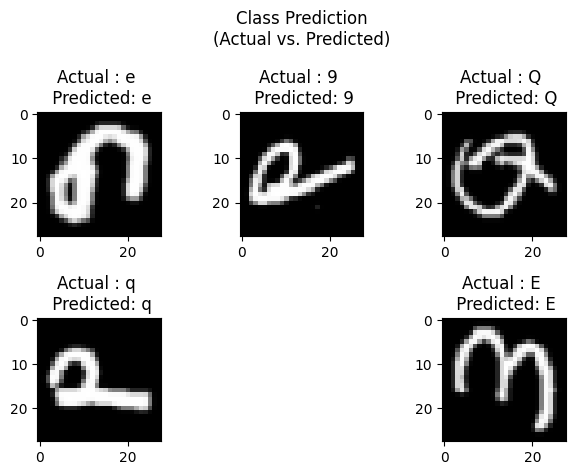

In [126]:
plt.suptitle("Class Prediction\n(Actual vs. Predicted)")
for i in range(6):
    image = x_test[i].reshape((28,28))
    plt.subplot(2,3,i+1)
    plt.title(f"Actual : {letter(y_test[i])} \n Predicted: {letter(predicted_labels[i])}")
    plt.imshow(image,cmap="gray")
    plt.tight_layout()

# Model Evaluation :

In [127]:
conf_matrix = confusion_matrix(y_test,predicted_labels)
accuracy = accuracy_score(y_test, predicted_labels)
precision = precision_score(y_test, predicted_labels, average='weighted')  
recall = recall_score(y_test, predicted_labels, average='weighted')  
f1 = f1_score(y_test, predicted_labels, average='weighted')  

print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 83.36%
Precision: 0.83
Recall: 0.83
F1 Score: 0.83


# Confusion Matrix for Class Prediction :


<Axes: >

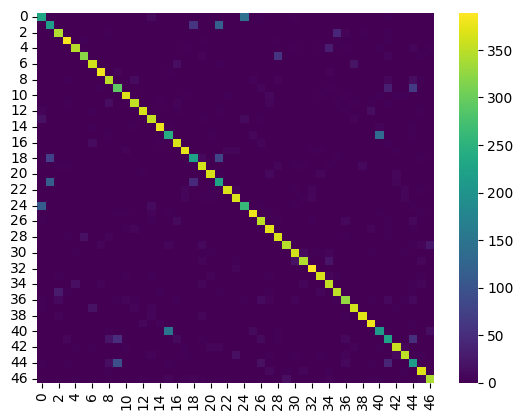

In [128]:
sns.heatmap(conf_matrix,cmap='viridis')

In [2]:
model.save("ocr-full.h5")

NameError: name 'model' is not defined

In [5]:
new_model= tf.keras.models.load_model('ocr-full.h5')

ValueError: cannot reshape array of size 1444 into shape (1,784)

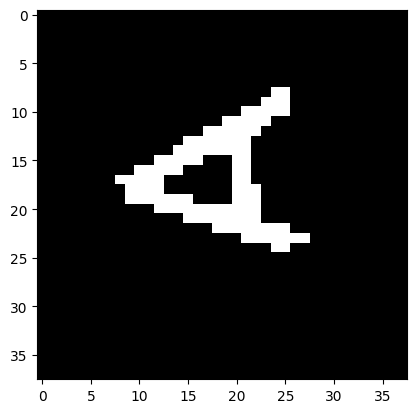

In [14]:
import numpy as np
from PIL import Image 
import cv2

image_path = 'letter.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)


image = cv2.resize(image, (28, 28))
# Invert the image
image = cv2.bitwise_not(image)


# Rotate the image by -90 degrees
image = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)

#Flip on x axis
image= cv2.flip(image, 0)

plt.imshow(image, cmap="gray")

image_array = image / 255.0
image_array = image_array.reshape(1, 784)


predicted_probabilities = new_model.predict(image_array)
prediction_p=tf.nn.softmax(predicted_probabilities)
predicted_labels = np.argmax(prediction_p) 

print("Predicted Label:", letter(predicted_labels))

In [7]:
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('letter3.png')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Threshold the image to binary
_, binary = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV)

# Find contours of the characters
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Sort contours based on their x-coordinate
contours = sorted(contours, key=lambda x: cv2.boundingRect(x)[0])

predictions = []

for contour in contours:
    # Get bounding box coordinates for each character
    x, y, w, h = cv2.boundingRect(contour)
    
    # Extract individual character using slicing and resize it to 28x28 pixels 
    char_image = gray[y:y+h, x:x+w]
    
    # Apply properties to the segment
    img_resized = cv2.resize(char_image, (28, 28))
    img_resized = cv2.bitwise_not(img_resized)
    img_resized = cv2.flip(img_resized, 0)
    img_resized = np.rot90(img_resized, -1)
    img_resized = img_resized / 255.0
    
    # Flatten image
    img_flattened = img_resized.reshape(1, 784)
    
    predicted_probabilities = new_model.predict(img_flattened)
    prediction_p = tf.nn.softmax(predicted_probabilities)
    predicted_labels = np.argmax(prediction_p)
    
    # Append each character's image into a list 
    predictions.append(letter(predicted_labels))

predictions
    
    # plt.suptitle('Images')
    # i = 0
    # plt.subplot(2, 2, i + 1)
    # plt.title(f"Predicted: {i}")
    # i += 1
    # plt.imshow(img_resized, cmap="gray")

1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 28ms/step


['B', 'M', 'A', 'R']